# EDA

In [161]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## TN + TMDB

In [162]:
tmdb = pd.read_csv('../data/final/tn_tmdb_final.csv')
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1741 non-null   object 
 1   title              1741 non-null   object 
 2   production_budget  1741 non-null   int64  
 3   worldwide_gross    1741 non-null   int64  
 4   premiere_year      1741 non-null   int64  
 5   day                1741 non-null   int64  
 6   original_language  1741 non-null   object 
 7   ROI                1741 non-null   float64
 8   Action             1741 non-null   int64  
 9   Adventure          1741 non-null   int64  
 10  Animation          1741 non-null   int64  
 11  Comedy             1741 non-null   int64  
 12  Crime              1741 non-null   int64  
 13  Documentary        1741 non-null   int64  
 14  Drama              1741 non-null   int64  
 15  Family             1741 non-null   int64  
 16  Fantasy            1741 

### Genres as X and ROI as y

In [163]:
y_1 = tmdb['ROI']
X_1 = tmdb.drop(columns=['ROI', 'worldwide_gross', 'production_budget', 'release_date', 'title', 'original_language', 'day', 'premiere_year', 'premiere_month_1', 'premiere_month_2', 'premiere_month_3', 'premiere_month_4', 'premiere_month_5', 'premiere_month_6',
'premiere_month_7', 'premiere_month_8', 'premiere_month_9', 'premiere_month_10', 'premiere_month_11', 'premiere_month_12'])

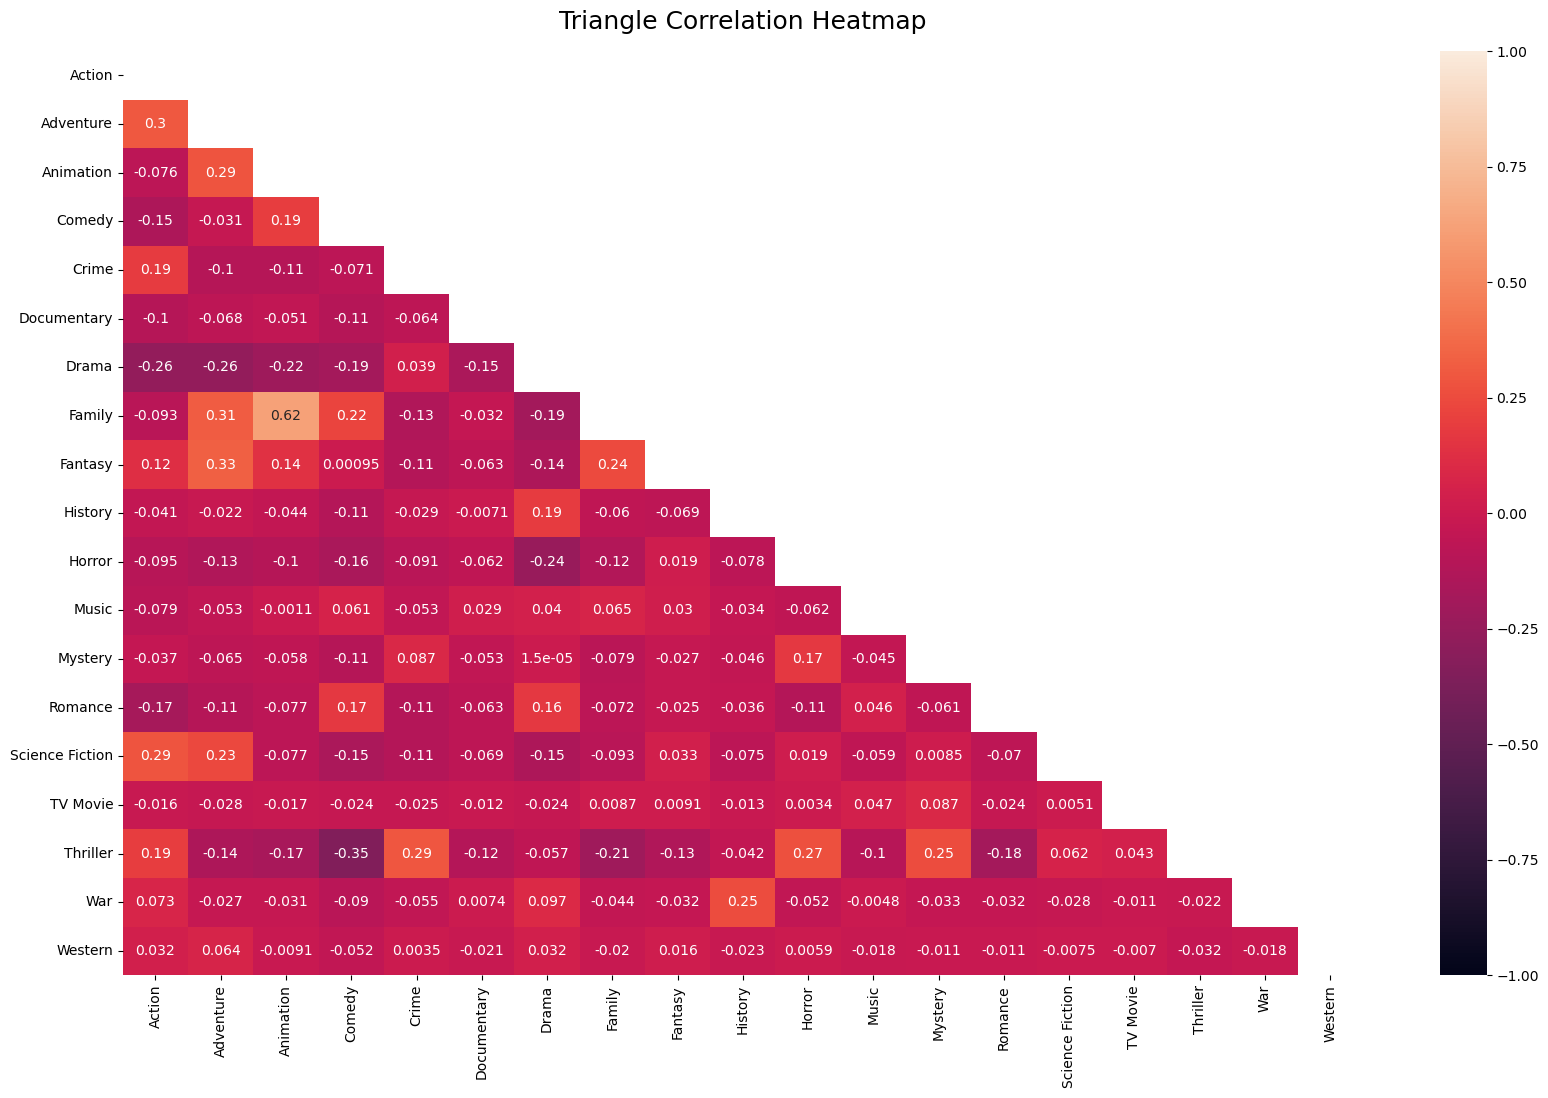

In [164]:
plt.figure(figsize=(20, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X_1.corr(), dtype=bool))
heatmap = sns.heatmap(X_1.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [165]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Action           1741 non-null   int64
 1   Adventure        1741 non-null   int64
 2   Animation        1741 non-null   int64
 3   Comedy           1741 non-null   int64
 4   Crime            1741 non-null   int64
 5   Documentary      1741 non-null   int64
 6   Drama            1741 non-null   int64
 7   Family           1741 non-null   int64
 8   Fantasy          1741 non-null   int64
 9   History          1741 non-null   int64
 10  Horror           1741 non-null   int64
 11  Music            1741 non-null   int64
 12  Mystery          1741 non-null   int64
 13  Romance          1741 non-null   int64
 14  Science Fiction  1741 non-null   int64
 15  TV Movie         1741 non-null   int64
 16  Thriller         1741 non-null   int64
 17  War              1741 non-null   int64
 18  Western 

In [166]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_1)
scaled_df = pd.DataFrame(scaled_data, columns=X_1.columns)

In [167]:
X_1_augmented = sm.add_constant(X_1)
X_1_augmented

,const,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1737,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1738,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1739,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [168]:
tmdb_regression = sm.OLS(y_1, X_1_augmented).fit()

In [169]:
print(tmdb_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.987
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.57e-05
Time:                        23:50:32   Log-Likelihood:                -6748.1
No. Observations:                1741   AIC:                         1.354e+04
Df Residuals:                    1721   BIC:                         1.365e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5793      0.858     

In [170]:
tmdb_regression.rsquared_adj

0.021235109790455953

### Premiere months as X and ROI as y

In [171]:
y_2 = tmdb['ROI']
X_2 = tmdb.drop(columns=['ROI', 'worldwide_gross', 'production_budget', 'release_date', 'title', 'original_language', 'day', 'premiere_year', 'Action', 
'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 
'War', 'Western'])

In [172]:
X_2_augmented = sm.add_constant(X_2)
X_2_augmented

,const,premiere_month_1,premiere_month_2,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
0,1.0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,0,0,0,1,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,1.0,0,1,0,0,0,0,0,0,0,0,0,0
1737,1.0,0,0,1,0,0,0,0,0,0,0,0,0
1738,1.0,1,0,0,0,0,0,0,0,0,0,0,0
1739,1.0,0,0,0,0,0,0,0,0,1,0,0,0


In [173]:
tmdb_regression_2 = sm.OLS(y_2, X_2_augmented.astype(float)).fit()

In [174]:
tmdb_regression_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.418
Date:                Wed, 02 Oct 2024   Prob (F-statistic):              0.150
Time:                        23:50:32   Log-Likelihood:                -6767.8
No. Observations:                1741   AIC:                         1.356e+04
Df Residuals:                    1728   BIC:                         1.363e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.997e+12    2.3e+13      0.260      0.795   -3.92e+13    5.12e+13
premiere_month_1  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_2  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_3  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_4  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_5  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_6  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_7  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_8  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_9  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_10 -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_11 -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_12 -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
==============================================================================
Omnibus:                     4286.981   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50676440.549
Skew:                          25.071   Prob(JB):                         0.00
Kurtosis:                     837.308   Cond. No.                     3.05e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [175]:
y_3 = tmdb['ROI']
X_3 = tmdb.drop(columns=['ROI', 'release_date', 'title', 'original_language', 'day', 'premiere_year', 'worldwide_gross', 'production_budget'])

In [176]:
X_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Action             1741 non-null   int64
 1   Adventure          1741 non-null   int64
 2   Animation          1741 non-null   int64
 3   Comedy             1741 non-null   int64
 4   Crime              1741 non-null   int64
 5   Documentary        1741 non-null   int64
 6   Drama              1741 non-null   int64
 7   Family             1741 non-null   int64
 8   Fantasy            1741 non-null   int64
 9   History            1741 non-null   int64
 10  Horror             1741 non-null   int64
 11  Music              1741 non-null   int64
 12  Mystery            1741 non-null   int64
 13  Romance            1741 non-null   int64
 14  Science Fiction    1741 non-null   int64
 15  TV Movie           1741 non-null   int64
 16  Thriller           1741 non-null   int64
 17  War           

In [177]:
X_3_augmented = sm.add_constant(X_3)
X_3_augmented

,const,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
0,1.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1737,1.0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1738,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [178]:
tmdb_regression_3 = sm.OLS(y_3, X_3_augmented).fit()

In [179]:
tmdb_regression_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.507
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.30e-05
Time:                        23:50:32   Log-Likelihood:                -6738.8
No. Observations:                1741   AIC:                         1.354e+04
Df Residuals:                    1710   BIC:                         1.371e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.3615      0.792      4.244      0.000       1.808       4.915
Action               -1.3427      0.799     -1.681      0.093      -2.909       0.224
Adventure             0.1136      0.941      0.121      0.904      -1.732       1.959
Animation             1.4796      1.476      1.002      0.316      -1.416       4.375
Comedy               -0.7600      0.739     -1.028      0.304      -2.210       0.690
Crime                -1.0266      0.925     -1.110      0.267      -2.840       0.787
Documentary          -1.3826      1.696     -0.815      0.415      -4.709       1.944
Drama                -1.0805      0.722     -1.497      0.134      -2.496       0.335
Family               -0.8842      1.272     -0.695      0.487      -3.379       1.611
Fantasy              -0.9862      1.028     -0.959      0.338      -3.003       1.031
History              -0.6640      1.518     -0.437      0.662      -3.642       2.314
Horror                4.8519      1.005      4.827      0.000       2.880       6.823
Music                -0.0577      1.805     -0.032      0.974      -3.598       3.483
Mystery              -0.3820      1.143     -0.334      0.738      -2.623       1.859
Romance               0.1433      0.903      0.159      0.874      -1.629       1.915
Science Fiction      -0.8867      0.974     -0.910      0.363      -2.797       1.024
TV Movie             -1.4880      4.492     -0.331      0.740     -10.297       7.321
Thriller              0.5813      0.785      0.741      0.459      -0.958       2.121
War                  -0.7752      1.817     -0.427      0.670      -4.340       2.789
Western              -2.0275      2.601     -0.780      0.436      -7.129       3.074
premiere_month_1      0.8305      1.045      0.795      0.427      -1.219       2.880
premiere_month_2     -0.4678      1.027     -0.455      0.649      -2.483       1.547
premiere_month_3     -0.6325      0.935     -0.677      0.499      -2.466       1.201
premiere_month_4     -0.2509      0.924     -0.272      0.786      -2.063       1.561
premiere_month_5     -0.2538      1.050     -0.242      0.809      -2.314       1.806
premiere_month_6      0.8599      0.952      0.903      0.367      -1.007       2.727
premiere_month_7      3.7747      0.936      4.033      0.000       1.939       5.610
premiere_month_8     -0.5017      0.929     -0.540      0.589      -2.324       1.321
premiere_month_9     -1.0179      0.910     -1.118      0.264      -2.803       0.767
premiere_month_10     0.2804      0.873      0.321      0.748      -1.433       1.993
premiere_month_11     0.7214      0.918      0.785      0.432      -1.080       2.523
premiere_month_12     0.0193      0.886      0.022      0.983      -1.718       1.757
=========================================================================

---

## TN + IMDB

In [181]:
imdb = pd.read_csv('../data/final/tn_imdb_final.csv')
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2095 non-null   object 
 1   production_budget  2095 non-null   int64  
 2   worldwide_gross    2095 non-null   int64  
 3   runtime_minutes    1939 non-null   float64
 4   premiere_year      2095 non-null   int64  
 5   premiere_day       2095 non-null   int64  
 6   ROI                2095 non-null   float64
 7   Action             2095 non-null   int64  
 8   Adventure          2095 non-null   int64  
 9   Animation          2095 non-null   int64  
 10  Biography          2095 non-null   int64  
 11  Comedy             2095 non-null   int64  
 12  Crime              2095 non-null   int64  
 13  Documentary        2095 non-null   int64  
 14  Drama              2095 non-null   int64  
 15  Family             2095 non-null   int64  
 16  Fantasy            2095 

In [182]:
y_4 = imdb['ROI']
X_4 = imdb.drop(columns=['ROI', 'runtime_minutes', 'worldwide_gross', 'production_budget', 'title', 'premiere_day', 'premiere_year'])

In [183]:
X_4_augmented = sm.add_constant(X_4)
X_4_augmented

,const,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2091,1.0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2092,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2093,1.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [184]:
imdb_regression = sm.OLS(y_4, X_4_augmented).fit()

In [185]:
print(imdb_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.173
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           0.000134
Time:                        23:50:32   Log-Likelihood:                -8465.4
No. Observations:                2095   AIC:                         1.700e+04
Df Residuals:                    2061   BIC:                         1.719e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.3090      0.93

#### Splitting movie runtime into buckets as another set of categorical variables

In [186]:
imdb[imdb['runtime_minutes'].isna()]

,title,production_budget,worldwide_gross,runtime_minutes,premiere_year,premiere_day,ROI,Action,Adventure,Animation,...,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
28,King Kong,207000000,550517357,NaN,2005,14,1.659504,1,1,0,...,0,0,0,0,0,0,0,0,0,1
30,Titanic,200000000,2208208395,NaN,1997,19,10.041042,0,1,0,...,0,0,0,0,0,0,0,0,0,1
75,Coco,175000000,798008101,NaN,2017,22,3.560046,0,0,0,...,0,0,0,0,0,0,0,0,1,0
160,Noah,130000000,352831065,NaN,2014,28,1.714085,0,0,1,...,1,0,0,0,0,0,0,0,0,0
252,What Lies Beneath,90000000,288693989,NaN,2000,21,2.207711,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,Jackpot,400000,44452,NaN,2001,27,-0.888870,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2060,Swingers,200000,6618578,NaN,1996,18,32.092890,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2088,Emily,27000,3547,NaN,2017,27,-0.868630,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2089,The Terrorist,25000,195043,NaN,2000,14,6.801720,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
imdb.dropna(subset=['runtime_minutes'], inplace=True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 2094
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1939 non-null   object 
 1   production_budget  1939 non-null   int64  
 2   worldwide_gross    1939 non-null   int64  
 3   runtime_minutes    1939 non-null   float64
 4   premiere_year      1939 non-null   int64  
 5   premiere_day       1939 non-null   int64  
 6   ROI                1939 non-null   float64
 7   Action             1939 non-null   int64  
 8   Adventure          1939 non-null   int64  
 9   Animation          1939 non-null   int64  
 10  Biography          1939 non-null   int64  
 11  Comedy             1939 non-null   int64  
 12  Crime              1939 non-null   int64  
 13  Documentary        1939 non-null   int64  
 14  Drama              1939 non-null   int64  
 15  Family             1939 non-null   int64  
 16  Fantasy            1939 non-n

In [188]:
imdb[imdb['runtime_minutes'] == 0]

,title,production_budget,worldwide_gross,runtime_minutes,premiere_year,premiere_day,ROI,Action,Adventure,Animation,...,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12


In [189]:
# Creating runtime buckets
length60 = imdb['runtime_minutes'].between(0,60)
length90 = imdb['runtime_minutes'].between(60,90)
length120 = imdb['runtime_minutes'].between(90,120)
length180 = imdb['runtime_minutes'].between(120,180)
imdb['length_60'] = length60
imdb['length_90'] = length90
imdb['length_120'] = length120
imdb['length_180'] = length180

In [190]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 2094
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1939 non-null   object 
 1   production_budget  1939 non-null   int64  
 2   worldwide_gross    1939 non-null   int64  
 3   runtime_minutes    1939 non-null   float64
 4   premiere_year      1939 non-null   int64  
 5   premiere_day       1939 non-null   int64  
 6   ROI                1939 non-null   float64
 7   Action             1939 non-null   int64  
 8   Adventure          1939 non-null   int64  
 9   Animation          1939 non-null   int64  
 10  Biography          1939 non-null   int64  
 11  Comedy             1939 non-null   int64  
 12  Crime              1939 non-null   int64  
 13  Documentary        1939 non-null   int64  
 14  Drama              1939 non-null   int64  
 15  Family             1939 non-null   int64  
 16  Fantasy            1939 non-n

In [191]:
y_5 = imdb['ROI']
X_5 = imdb.drop(columns=['ROI', 'runtime_minutes', 'worldwide_gross', 'production_budget', 'title', 'premiere_day', 'premiere_year'])

In [192]:
X_5_augmented = sm.add_constant(X_5)
X_5_augmented

,const,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12,length_60,length_90,length_120,length_180
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,False,False,True,False
1,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
2,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,True,False
3,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
4,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,False,True,False,False
2090,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,False,False,True,False
2091,1.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,False,True,False,False
2092,1.0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,False,False,True,False


In [193]:
imdb_regression_2 = sm.OLS(y_5, X_5_augmented.astype(float)).fit()

In [194]:
print(imdb_regression_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.316
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.37e-05
Time:                        23:50:32   Log-Likelihood:                -7890.5
No. Observations:                1939   AIC:                         1.586e+04
Df Residuals:                    1901   BIC:                         1.607e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.6581      1.93

In [195]:
imdb_regression_2.params

const                2.658070
Action               0.684662
Adventure           -1.023658
Animation            1.672760
Biography            2.681580
Comedy               0.414559
Crime               -1.534857
Documentary         -0.530851
Drama               -0.578500
Family               1.166377
Fantasy             -0.962656
History             -2.485301
Horror               4.293949
Music                0.246186
Musical             -0.577329
Mystery              4.742777
News                 2.030379
Romance              0.932870
Sci-Fi              -1.235976
Sport               -0.530011
Thriller             1.565993
War                 -0.108374
Western             -1.376139
premiere_month_1     0.766421
premiere_month_2    -0.917012
premiere_month_3    -0.536195
premiere_month_4    -0.778097
premiere_month_5    -0.042636
premiere_month_6     0.354948
premiere_month_7     3.063173
premiere_month_8     0.839560
premiere_month_9    -1.227439
premiere_month_10   -0.542087
premiere_m

In [196]:
imdb[imdb['ROI'] <= 0]

,title,production_budget,worldwide_gross,runtime_minutes,premiere_year,premiere_day,ROI,Action,Adventure,Animation,...,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12,length_60,length_90,length_120,length_180
2,Dark Phoenix,350000000,149762350,113.0,2019,7,-0.572108,1,1,0,...,0,0,0,0,0,0,False,False,True,False
9,The Lone Ranger,275000000,260002115,150.0,2013,2,-0.054538,1,1,0,...,1,0,0,0,0,0,False,False,False,True
77,King Arthur: Legend of the Sword,175000000,139630336,126.0,2017,12,-0.202112,1,1,0,...,0,0,0,0,0,0,False,False,False,True
78,47 Ronin,175000000,151716815,128.0,2013,25,-0.133047,1,1,0,...,0,0,0,0,0,1,False,False,False,True
105,Deepwater Horizon,156000000,122603824,107.0,2016,30,-0.214078,1,0,0,...,0,0,1,0,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Absentia,70000,8555,87.0,2011,31,-0.877786,0,0,0,...,0,0,0,0,0,1,False,True,False,False
2083,Supporting Characters,60000,4917,87.0,2013,25,-0.918050,0,0,0,...,0,0,0,0,0,0,False,True,False,False
2085,Counting,50000,8374,111.0,2015,31,-0.832520,0,0,0,...,1,0,0,0,0,0,False,False,True,False
2086,Raymond Did It,40000,3632,83.0,2011,11,-0.909200,0,0,0,...,0,0,0,0,0,0,False,True,False,False


#### Testing regression with revenue as dependent variable

In [198]:
y_6 = imdb['worldwide_gross']
X_6 = imdb.drop(columns=['ROI', 'runtime_minutes', 'worldwide_gross', 'title', 'premiere_day', 'premiere_year'])

In [199]:
X_6_augmented = sm.add_constant(X_6)
X_6_augmented

,const,production_budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12,length_60,length_90,length_120,length_180
0,1.0,425000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,False,False,True,False
1,1.0,410600000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
2,1.0,350000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,True,False
3,1.0,330600000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
4,1.0,300000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,1.0,30000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,False,True,False,False
2090,1.0,25000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,False,False,True,False
2091,1.0,10000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,False,True,False,False
2092,1.0,10000,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,False,False,True,False


In [200]:
imdb_regression_rev = sm.OLS(y_6, X_6_augmented.astype(float)).fit()

In [201]:
print(imdb_regression_rev.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     86.06
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:50:33   Log-Likelihood:                -39031.
No. Observations:                1939   AIC:                         7.814e+04
Df Residuals:                    1900   BIC:                         7.836e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.314e+06   1.85e+0